# Understanding Descriptive Statistics

Import the necessary libraries here:

In [39]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [86]:
dice = []
for i in range(0,10):
    n = random.choice(range(1,7))
    dice.append(n)
df=pd.DataFrame(dice)
df

,0
0,3
1,3
2,2
3,5
4,2
5,1
6,6
7,2
8,4
9,6


#### 2.- Plot the results sorted by value.

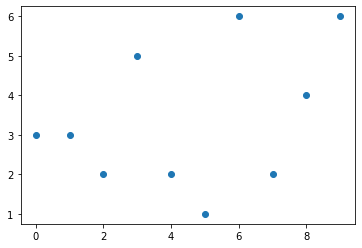

In [93]:
df.sort_values(by=0)
plt.plot(dice,'o');

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<BarContainer object of 6 artists>

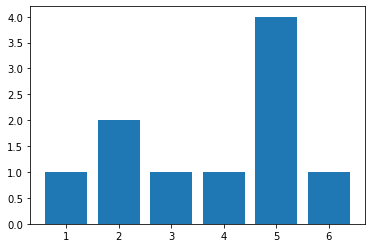

In [77]:
from collections import Counter
w=Counter(dice)
plt.bar(w.keys(), w.values())


En el segeundo gráfico claramente podemos ver el numero de veces que ha salido cada numero.
En el primero, tan solo vemos el numero que ha ido saliendo en cada tirada (eje X), por lo que aporta muy poca información clara.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [175]:
def mean (a):
    sum= 0
    for i in a:
        sum+= i
    return sum/len(a)

mean(dice)


3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [178]:
def freq_dist(a):
    freq_dist = {}
    for item in a:
        if item in freq_dist:
            freq_dist[item] += 1
        else:
            freq_dist[item] = 1
    dict(sorted(freq_dist.items()))

    return(freq_dist)
freq_dist(dice)

{1: 1, 2: 3, 3: 2, 4: 1, 5: 1, 6: 2}

In [109]:
dice_mean= (sum(k*v for k,v in freq_dist.items()))/len(dice)
dice_mean

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [136]:
def median(a):
    a.sort()
    if len(a)%2!=0:
        median=a[(len(a)//2)]
    else: 
        median=(a[(len(a)//2)-1]+a[(len(a)//2)])/2
    return median

median(dice)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [157]:
def quartiles(a):
    a.sort()
    if len(a)%2!=0:
        q1=a[(len(a)//4)]
        q2=a[(len(a)//2)]
        q3=a[(len(a)*3//4)]
    else: 
        median=(a[(len(a)//2)-1]+a[(len(a)//2)])/2
        q1=(a[(len(a)//4)-1]+a[(len(a)//4)])/2
        q2=(a[(len(a)//2)-1]+a[(len(a)//2)])/2
        q3=(a[(len(a)*3//4)-1]+a[(len(a)*3//4)])/2
    return q1,q2,q3

quartiles(dice)


(2.0, 3.0, 4.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

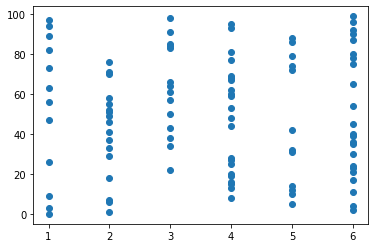

In [195]:
df2=pd.read_csv('../data/roll_the_dice_hundred.csv')
plt.plot(df2['value'],df2['roll'],'o');

Rápidamente podemos ver como el número 5 es el que menos veces aparece.
También que el número 6 aparece de manera constante, mientras que el 3 aparece más bien hacia el final.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [181]:
mean(list(df2['value']))

3.74

#### 3.- Now, calculate the frequency distribution.


In [191]:
df2_freq=freq_dist(list(df2['value']))
df2_freq

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

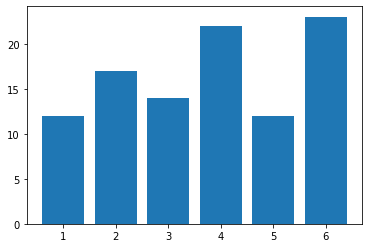

In [196]:
plt.bar(df2_freq.keys(), df2_freq.values());

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

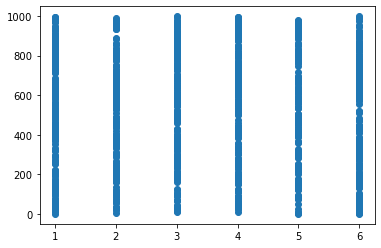

In [198]:
df3=pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.plot(df3['value'],df3['roll'],'o');

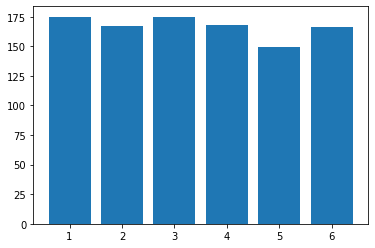

In [199]:
df3_freq=freq_dist(list(df3['value']))
plt.bar(df3_freq.keys(), df3_freq.values());

El numero de repeticiones es prácticamente el mismo para todos los valores del dado.
Es decir, parece que cuantas mas veces tiremos, mas se iguala el numero de repeticiones.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

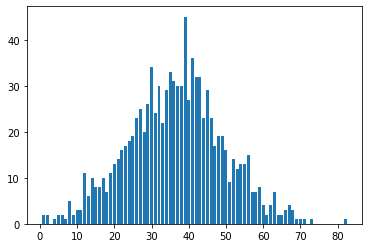

In [204]:
ages=pd.read_csv('../data/ages_population.csv')
ages_freq=freq_dist(list(ages['observation']))
plt.bar(ages_freq.keys(), ages_freq.values());

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [208]:
ages_mean= mean(ages['observation'])
ages_std=ages['observation'].std()
print(ages_mean)
print(ages_std)

36.56
12.81649962597677


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

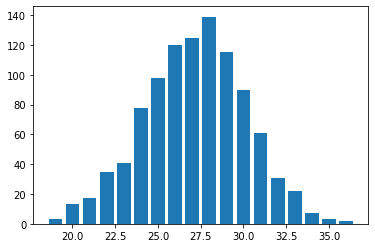

In [209]:
ages2=pd.read_csv('../data/ages_population2.csv')
ages2_freq=freq_dist(list(ages2['observation']))
plt.bar(ages2_freq.keys(), ages2_freq.values());

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

Aunque la distribución de las frecuencias es parecia (normal), los valores son notablemente diferents.
En este caso, vemos que el rango es de entre unos 20 a 35 años, por lo que la mediana es de aproximadamente unos 27,5 años.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [210]:
ages2_mean= mean(ages2['observation'])
ages2_std=ages2['observation'].std()
print(ages2_mean)
print(ages2_std)

27.155
2.9698139326891835


Como podemos ver, la media en este caso es mas baja, y además la desviación std es notablemente mas pequeña, por lo que los datos estan menos dispersados.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

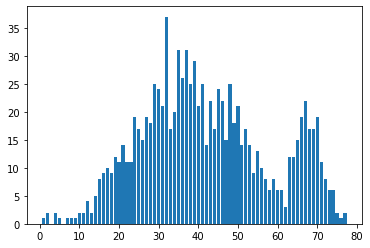

In [211]:
ages3=pd.read_csv('../data/ages_population3.csv')
ages3_freq=freq_dist(list(ages3['observation']))
plt.bar(ages3_freq.keys(), ages3_freq.values());

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [212]:
ages3_mean= mean(ages3['observation'])
ages3_std=ages3['observation'].std()
print(ages3_mean)
print(ages3_std)

41.989
16.14470595986593


En este caso podemos ver como la media es superior, pero ademas la desviación std también es bastante alta, lo que marca una dispersión de los datos, que además vemos gráficamente

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [214]:
quartiles(list(ages3['observation']))

(30.0, 40.0, 53.0)

En este caso, vemos como la media y la mediana no varian demasiado entre si (entre los 40 y los 42).

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [217]:
per10=ages3.observation.quantile(0.1) # 10th percentile
print(per10)

per50=ages3.observation.quantile(0.5) # same as median
print(per50)

per90=ages3.observation.quantile(0.9) # 90th percentile
print(per90)

22.0
40.0
67.0


De nuevo vemos como el 90% de los datos estan comprendidos entre el rango de 22 a 67 años.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
"""
your comments here
"""